参数说明：

code：股票代码，即6位数字代码，或者指数代码（sh=上证指数 sz=深圳成指 hs300=沪深300指数 sz50=上证50 zxb=中小板 cyb=创业板）
start：开始日期，格式YYYY-MM-DD
end：结束日期，格式YYYY-MM-DD
ktype：数据类型，D=日k线 W=周 M=月 5=5分钟 15=15分钟 30=30分钟 60=60分钟，默认为D
retry_count：当网络异常后重试次数，默认为3
pause:重试时停顿秒数，默认为0
返回值说明：

date：日期
open：开盘价
high：最高价
close：收盘价
low：最低价
volume：成交量
price_change：价格变动
p_change：涨跌幅
ma5：5日均价
ma10：10日均价
ma20:20日均价
v_ma5:5日均量
v_ma10:10日均量
v_ma20:20日均量
turnover:换手率[注：指数无此项]

In [1]:
import tushare as ts
import pandas as pd
data1 = ts.get_hist_data('600848') #一次性获取全部日k线数据
data1 = ts.get_hist_data('600848',start='2015-01-05',end='2015-01-09')

In [2]:
'''
ts.get_hist_data('600848', ktype='W') #获取周k线数据
ts.get_hist_data('600848', ktype='M') #获取月k线数据
ts.get_hist_data('600848', ktype='5') #获取5分钟k线数据
ts.get_hist_data('600848', ktype='15') #获取15分钟k线数据
ts.get_hist_data('600848', ktype='30') #获取30分钟k线数据
ts.get_hist_data('600848', ktype='60') #获取60分钟k线数据
ts.get_hist_data('sh'）#获取上证指数k线数据，其它参数与个股一致，下同
ts.get_hist_data('sz'）#获取深圳成指k线数据
ts.get_hist_data('hs300'）#获取沪深300指数k线数据
ts.get_hist_data('sz50'）#获取上证50指数k线数据
ts.get_hist_data('zxb'）#获取中小板指数k线数据
ts.get_hist_data('cyb'）#获取创业板指数k线数据
'''

"\nts.get_hist_data('600848', ktype='W') #\xe8\x8e\xb7\xe5\x8f\x96\xe5\x91\xa8k\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\nts.get_hist_data('600848', ktype='M') #\xe8\x8e\xb7\xe5\x8f\x96\xe6\x9c\x88k\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\nts.get_hist_data('600848', ktype='5') #\xe8\x8e\xb7\xe5\x8f\x965\xe5\x88\x86\xe9\x92\x9fk\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\nts.get_hist_data('600848', ktype='15') #\xe8\x8e\xb7\xe5\x8f\x9615\xe5\x88\x86\xe9\x92\x9fk\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\nts.get_hist_data('600848', ktype='30') #\xe8\x8e\xb7\xe5\x8f\x9630\xe5\x88\x86\xe9\x92\x9fk\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\nts.get_hist_data('600848', ktype='60') #\xe8\x8e\xb7\xe5\x8f\x9660\xe5\x88\x86\xe9\x92\x9fk\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\nts.get_hist_data('sh'\xef\xbc\x89#\xe8\x8e\xb7\xe5\x8f\x96\xe4\xb8\x8a\xe8\xaf\x81\xe6\x8c\x87\xe6\x95\xb0k\xe7\xba\xbf\xe6\x95\xb0\xe6\x8d\xae\xef\xbc\x8c\xe5\x85\xb6\xe5\xae\x83\xe5\x8f\x82\xe6\x95\xb0\xe4\xb8\x8e\xe4\xb8\xaa\xe8\x82\xa1\xe4\xb8\x80\xe8

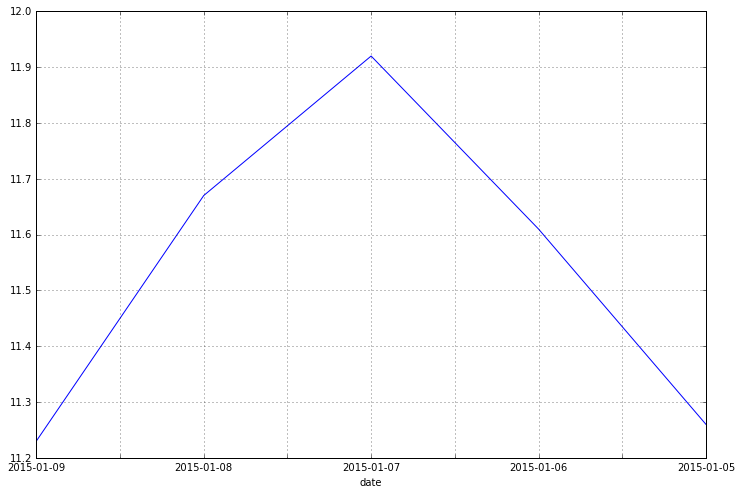

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
data1['close'].plot(style='b',figsize=(12,8))
plt.grid(True)

In [4]:
data1

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-09,11.68,11.71,11.23,11.19,44851.56,-0.44,-3.77,11.538,11.363,11.682,58792.43,60665.93,107924.27,1.54
2015-01-08,11.70,11.92,11.67,11.64,56845.71,-0.25,-2.10,11.516,11.349,11.647,57268.99,61376.00,105823.50,1.95
2015-01-07,11.58,11.99,11.92,11.48,86681.38,0.31,2.67,11.366,11.251,11.543,55049.74,61628.07,103010.58,2.97
2015-01-06,11.13,11.66,11.61,11.03,59199.93,0.35,3.11,11.182,11.155,11.382,54854.38,63401.05,98686.98,2.03
2015-01-05,11.16,11.39,11.26,10.89,46383.57,0.14,1.26,11.156,11.212,11.198,58648.75,68429.87,97141.81,1.59


In [5]:
df = ts.get_tick_data('600848',date='2014-01-09') #分笔数据只能按天提取。在读取csv的时候可以用parse_time=True来解析时间
df.head(10)

AttributeError: 'DataFrame' object has no attribute 'parse_'

In [ ]:
df['date'] = '2014-01-09-'
df.head()

In [ ]:
df['datetime'] = df['date'] + df['time'] #插入日期
df.head()

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) #将日期转为datetime 
del df['time'], df['date']
df.index = df['datetime']
df.head()

In [ ]:
df_res = df.resample(rule='1min', how='mean')

In [ ]:
df_res.fillna(method='ffill').head()

In [ ]:
df_res[['price','volume']].plot(subplots=True)

In [ ]:
df = ts.get_stock_basics()
date = df.ix['600848']['timeToMarket'] #获取股票的上市日期YYYYMMDD，运算速度极慢
date

In [ ]:
df_houfq = ts.get_h_data('600737', autype='hfq', start='2015-01-01', end='2015-05-01') #后复权

code:string,股票代码 e.g. 600848
start:string,开始日期 format：YYYY-MM-DD 为空时取当前日期
end:string,结束日期 format：YYYY-MM-DD 为空时取去年今日
autype:string,复权类型，qfq-前复权 hfq-后复权 None-不复权，默认为qfq
index:Boolean，是否是大盘指数，默认为False
retry_count : int, 默认3,如遇网络等问题重复执行的次数
pause : int, 默认 0,重复请求数据过程中暂停的秒数，防止请求间隔时间太短出现的问题

In [ ]:
today = ts.get_today_all() #获取当天所有行情


In [ ]:
today.head()

In [ ]:
today.sort_values('open', ascending=False) #排序

In [ ]:
ts.get_realtime_quotes(['600848','000980','000981']) #获取多个股票的实时分笔

In [ ]:
ts.get_realtime_quotes('sh')#上证指数
ts.get_realtime_quotes(['sh','sz','hs300','sz50','zxb','cyb'])#上证指数 深圳成指 沪深300指数 上证50 中小板 创业板

In [ ]:
df_today_ticks = ts.get_today_ticks('600737') #获取当日分笔
df_today_ticks.head(10)

In [ ]:
df_index = ts.get_index() #获取各类指数

In [ ]:
df_index

In [ ]:
df_dd = ts.get_sina_dd('600848', date='2016-07-26') #获取某股票，某日的大单交易数据，默认400手
#df = ts.get_sina_dd('600848', date='2015-12-24', vol=500)  #指定大于等于500手的数据
df_dd.head(12)

In [ ]:
df_basics = ts.get_stock_basics() #获取沪深上市公司基本情况，不需要参数。
df_basics.head(10)


属性包括：code,代码
name,名称
industry,所属行业
area,地区
pe,市盈率
outstanding,流通股本
totals,总股本(万)
totalAssets,总资产(万)
liquidAssets,流动资产
fixedAssets,固定资产
reserved,公积金
reservedPerShare,每股公积金
eps,每股收益
bvps,每股净资
pb,市净率


In [ ]:
df_profit = ts.get_profit_data(2014,3)#获取2014年第3季度的盈利能力数据
df_profit.head()

code,代码
name,名称
roe,净资产收益率(%)
net_profit_ratio,净利率(%)
gross_profit_rate,毛利率(%)
net_profits,净利润(万元)
eps,每股收益
business_income,营业收入(百万元)
bips,每股主营业务收入(元)

In [ ]:
df_opr = ts.get_operation_data(2014,3)#获取2014年第3季度的营运能力数据
df_opr.head(10)

code,代码
name,名称
arturnover,应收账款周转率(次)
arturndays,应收账款周转天数(天)
inventory_turnover,存货周转率(次)
inventory_days,存货周转天数(天)
currentasset_turnover,流动资产周转率(次)
currentasset_days,流动资产周转天数(天)

In [ ]:
df_growth = ts.get_growth_data(2014,3) #获取2014年第3季度的成长能力数据
df_growth.head(10)

code,代码
name,名称
mbrg,主营业务收入增长率(%)
nprg,净利润增长率(%)
nav,净资产增长率
targ,总资产增长率
epsg,每股收益增长率
seg,股东权益增长率

In [ ]:
df_debtpaying = ts.get_debtpaying_data(2014,3) #获取2014年第3季度的偿债能力数据
df_debtpaying.head(10)

code,代码
name,名称
currentratio,流动比率
quickratio,速动比率
cashratio,现金比率
icratio,利息支付倍数
sheqratio,股东权益比率
adratio,股东权益增长率

In [ ]:
df_cashflow = ts.get_cashflow_data(2014,3) #获取2014年第3季度的现金流量数据
df_cashflow.head()

code,代码
name,名称
cf_sales,经营现金净流量对销售收入比率
rateofreturn,资产的经营现金流量回报率
cf_nm,经营现金净流量与净利润的比率
cf_liabilities,经营现金净流量对负债比率
cashflowratio,现金流量比率